# Some basic exercises in micro-connectomics

Welcome! In this jupyter notebook we will perform some very basic micrco-connectomics analyses. We will run these analyses on a *connection matrix* that describes the structure of synaptic connections between neurons in a model of mouse neocortex. A connection matrix C for N neurons is an N x N boolean matrix such that C[i, j] = True if there is a synaptic connection from neuron i to neuron j. That is, it describes a directed graph of N nodes.

The file "1000_neurons.npz" that came bundled in this repository contains a matrix of modeled connections between 1000 neurons in the center of the lower limb representation of mouse neocortex.
Let's do some basic micro-connectomics analysis on them.

First, we load the matrix. It is in "Compressed Sparse Column" format using the scipy.sparse package.
We load it and for convenience also convert it to a dense numpy array (some analyses may be easier to run on the sparse format, some may be easier with the dense format)

In [ ]:
from scipy import sparse
import numpy

Msparse = sparse.load_npz('1000_neurons.npz')
Mdense = numpy.array(Msparse.todense())

print("There are {M} connections between {N} neurons in this matrix".format(M=Msparse.sum(), N=Msparse.shape[0]))

Now let's recreate some basic analyses of the micro-connectome of this population.
We will recreate some analyses in the following paper:
#### Perin et. al, 2011. "A synaptic organizing principle for cortical neuronal groups" - https://www.pnas.org/content/pnas/108/13/5419.full.pdf

As the first analysis, let's recreate the distance dependence of connectivity:

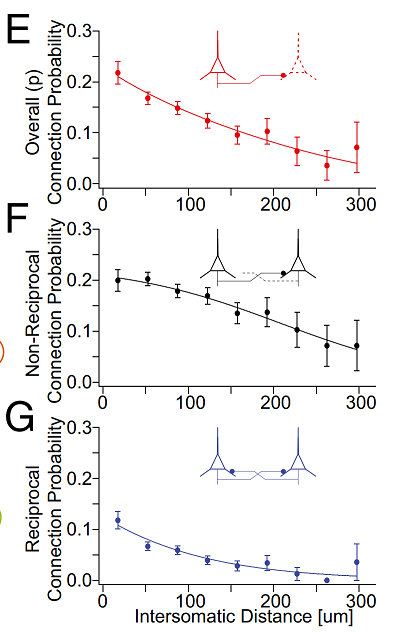

The plot shows the probability of a connection (P(A->B)), of a bidirectional connection (P(A<->B)) and of a unidirectional connection ( P( (A->B | B->A) & !(A<->B) ) ) against the distance between the pair of neurons (refer to the original paper for details).

While Perin et al. analyze the connectivity of only up to 12 neurons at a time, we can analyze the connectivity of all 1000 neurons at once.

However, in order to know the distances between neurons, we are going to have to load the locations of neurons (locations of their somas) in 3d space. The locations of neurons are in the file "1000_locations.npy" (units: um).

Then we can try to recreate the plot.

In [ ]:
xyz = numpy.load('1000_locations.npy')

print("""The population of size {sz} is centered
         around the point {center} in 3d space""".format(sz=xyz.shape[0],
                                                         center=numpy.mean(xyz, axis=0)))

In [ ]:
from matplotlib import pyplot as plt
# Put your code to recreate the three distance dependence plots here.
# Don't bother about getting colors and format details right. Basic plot is all that's needed.

# Calculate matrix of pairwise distances...
D = None # fill in

# Calculate reciprocal connectivity...
P_rec = None # fill in

# Calculate unidirectional connectivity...
P_uni = None # fill in

# Calculate distance bins
bins = None # fill in

# ...

The message of the plot is: There are more bidirectional connections than expected by chance. This overexpression of bidirectionality can be quantified as P(A->B | B<-A) / P(A->B). The value is larger than one for overexpression and smaller than one for underexpression. 

Let's calculate that.

In [ ]:
overexpression = None # fill in...

print("Reciprocal over/under-expression in the sample: {oe}".format(oe=overexpression))

Next let's compare that value to the distribution you would get in a simple control model: An Erdos-Renyi (ER) model of the same size and sparsity. That is, a model where each possible connection is present with the same probability and no statistical dependence between connections.

You can do that either analytically or by generating several random (ER) instances.

(Note that comparing to ER is a very basic and weak comparison; we usually would compare to more complex control models)

In [ ]:
# fill in...

Now, let's recreate another plot from the Perin et al. paper:
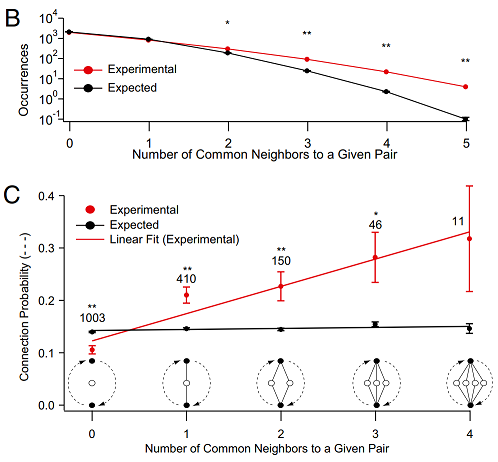

Panel B counts the distribution of common neighbors of pairs of neurons. A common neighbor of a pair is a third neuron that is connected to both of them. This can be further subdivided into common presynaptic and common postsynaptic neighbors.
That is, a common presynaptic neurons of A and B would be a neurons C, such that C->A and C->B; a common postsynaptic neuron if A->C and B->C. (It can of course be both at the same time).

Below, please recreate the analysis of the probability of common neighbor numbers in the population. Note that since Perin et al only sampled up to 12 neurons at a time they could only possibly find up to 10 common neighbors. Since we are sampling a thousand neurons, we will find much larger numbers! 
(Also, make sure not to accidently consider the number of common neighbors between a neuron and itself, which would just be its number of neighbors.)

Finally, let's generate two separate plots for presynaptic and postsynaptic neighbors.

In [ ]:
# Calculate number of common neighbors of pairs of neurons
CN_pre = None # fill in
CN_post = None # fill in

bins = range(0, numpy.max(CN_pre) + 2)
occurences = numpy.histogram(CN_pre, bins=bins)[0]

# plot...

bins = range(0, numpy.max(CN_post) + 2)
occurences = numpy.histogram(CN_post, bins=bins)[0]

# plot...

Panel C plots the probability of finding a connection between a pair of neurons against the number of common neighbors they share. For random (Erdos-Renyi) connectivity we would not expect a positive or negative trend. But Perin et al. found a clear positive trend.

Below, please recreate that analysis. Once again, let's do it separately for pre- and postsynaptic neighbors. 

In [ ]:
# fill in...

Is the trend statistically significant? Find out by comparing against the null hypothesis, which once again shall be an ER-type graph. 

In [ ]:
# fill in...

Finally, let's see to what degree we can scale up the analysis to larger matrices while still running it on a simple laptop.
Go to 
https://portal.bluebrain.epfl.ch/downloads/
And download the modelled *local* connectivity of any instance of any hemisphere of the VISli region. That region has around 20,000 neurons. See if you can plot the connection probability against the number of common postsynaptic neighbors for one instance of that region.

Note the format of the matrices that are downloaded on that page: Their first dimension is always around 9 million, representing the incoming connectivity from *all* neocortical neurons. You will have to also download the associated *indices* and turn that matrix into a NxN square matrix.

In [ ]:
# fill in...